<a href="https://colab.research.google.com/github/nidheesh-p/AI-Learning/blob/master/LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install langchain langchain-chroma langchain-openai=="0.3.27"
!pip install beautifulsoup4
!pip install langchain-community
!pip install faiss-cpu

INFO: pip is looking at multiple versions of langchain-chroma to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.8/449.8 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:0

In [5]:
import getpass
import os
from google.colab import userdata

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Simple LLM Call

In [7]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(api_key=os.environ["OPENAI_API_KEY"])

In [9]:
answer = llm.invoke("how can langsmith help with testing?")

In [10]:
print(answer)
print(type(answer))


content='Langsmith can help with testing by providing automated testing tools and frameworks to speed up the testing process, improve test coverage, and ensure the quality of the software being developed. This includes tools for unit testing, integration testing, regression testing, and performance testing. Langsmith can also help create test scripts, automate test execution, analyze test results, and generate test reports. Additionally, Langsmith can provide guidance on best practices for testing, help identify bugs and issues, and assist in troubleshooting and resolving testing problems. Overall, Langsmith can help streamline the testing process, save time and effort, and ensure that the software meets the desired quality standards.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 15, 'total_tokens': 143, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_

# That's not very interesting ... and there is no chaining anyways

# Let's Do Some Chaining

## Templating

In [11]:
from langchain_core.prompts import ChatPromptTemplate

template = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI bot. Your name is {name}."),
    ("human", "Hello, how are you doing?"),
    ("ai", "I'm doing well, thanks!"),
    ("human", "{user_input}"),
])

prompt_value = template.invoke(
    {
        "name": "Bob",
        "user_input": "What is your name?"
    }
)
# Output:
# ChatPromptValue(
#    messages=[
#        SystemMessage(content='You are a helpful AI bot. Your name is Bob.'),
#        HumanMessage(content='Hello, how are you doing?'),
#        AIMessage(content="I'm doing well, thanks!"),
#        HumanMessage(content='What is your name?')
#    ]
#)

In [12]:
for msg in prompt_value.messages:
  print(type(msg).__name__, ":", msg.content)

SystemMessage : You are a helpful AI bot. Your name is Bob.
HumanMessage : Hello, how are you doing?
AIMessage : I'm doing well, thanks!
HumanMessage : What is your name?


In [13]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a world class technical documentation writer."), # system instructions
    ("user", "{input}")
])

In [14]:
for msg in prompt.messages:
  print(type(msg).__name__, ":", msg)

SystemMessagePromptTemplate : prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a world class technical documentation writer.') additional_kwargs={}
HumanMessagePromptTemplate : prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}') additional_kwargs={}


## Chaining

In [15]:
chain = prompt | llm
## pass the prompt to the LLM

In [16]:
print(chain.first)

input_variables=['input'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a world class technical documentation writer.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})]


In [17]:
chain_result = chain.invoke({"input": "how can langsmith help with testing?"})

"system": "You are a world class technical documentation writer."

"user", "how can langsmith help with testing?"

In [18]:
print(chain_result.content)

Langsmith can help with testing in several ways:

1. **Automation**: Langsmith can automate various testing tasks such as unit testing, integration testing, and end-to-end testing. It can generate test cases, execute tests, and validate results, which can significantly reduce the manual effort required for testing.

2. **Test Data Generation**: Langsmith can generate realistic test data that covers a wide range of scenarios and edge cases. This can help improve test coverage and identify potential issues early in the development process.

3. **Performance Testing**: Langsmith can simulate large amounts of virtual users to test the performance and scalability of an application. It can generate load scenarios and monitor response times to identify bottlenecks and areas for optimization.

4. **Regression Testing**: Langsmith can help automate regression testing by rerunning tests on new code changes to ensure that existing functionality has not been impacted. This can save time and effort

In [19]:
print(chain_result.response_metadata)

{'token_usage': {'completion_tokens': 263, 'prompt_tokens': 28, 'total_tokens': 291, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CVPV9RIgfI5QygoN3arC0bnU1o4dV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}


# More Chaining

In [20]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()

In [28]:
chain = prompt | llm | output_parser

In [22]:
print(llm.invoke("how can langsmith help with testing?"))

content='Langsmith can help with testing by providing automation tools that can be used to streamline the testing process. It can generate test cases, execute tests, analyze results, and provide detailed reports on the testing process. It can also help with test data generation, test environment setup, and integration testing with other tools and systems. Additionally, Langsmith can be used to perform continuous integration and continuous deployment (CI/CD) testing to ensure that changes are properly tested and deployed to production environments.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 96, 'prompt_tokens': 15, 'total_tokens': 111, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CVPWTTSVpaMpozt3MtJsC

In [29]:
chain_result = chain.invoke({"input": "how can langsmith help with testing?"})

In [30]:
print(chain_result)

Langsmith, as a sophisticated language model developed by OpenAI, can assist with testing in various ways:

1. Test scenario generation: Langsmith can help generate test cases and scenarios by providing insights, ideas, and examples based on the input provided. This can help testers come up with comprehensive test plans.

2. Exploratory testing support: Testers can interact with Langsmith to brainstorm ideas for exploratory testing, validate test data, or receive prompts for different scenarios to explore edge cases.

3. Test automation: Langsmith can assist in writing test scripts or test automation code by providing sample code snippets, suggesting best practices, and helping with troubleshooting errors.

4. Documentation support: Langsmith can help in creating test documentation, such as test plans, test cases, test reports, and user manuals, by suggesting clear and concise language, formatting guidance, and examples.

5. Bug reporting: Langsmith can aid in drafting detailed and acc

# Where are the retrieval from <u>**R**</u>AG

In [31]:
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader("https://docs.smith.langchain.com/user_guide")

docs = loader.load()

In [33]:
print(docs)

[Document(metadata={'source': 'https://docs.smith.langchain.com/user_guide', 'title': 'Overview - Docs by LangChain', 'language': 'en'}, page_content="Overview - Docs by LangChainSkip to main contentWe've raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangSmithSearch...⌘KGitHubTry LangSmithTry LangSmithSearch...NavigationAccount administrationOverviewGet startedObservabilityEvaluationPrompt engineeringDeploymentAgent BuilderHostingOverviewPlansCreate an account and API keyAccount administrationOverviewSet up a workspaceManage organizations using the APIManage billingSet up resource tagsUser managementReferenceLangSmith Python SDKLangSmith JS/TS SDKLangGraph Python SDKLangGraph JS/TS SDKLangSmith APIAPI reference for LangSmith DeploymentAdditional resourcesReleases & changelogsData managementScalability & resilienceAuthentication methodsFAQsRegions FAQPricing FAQOn this pageResource HierarchyOrganizationsWorkspacesResource tagsU

In [32]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

In [35]:
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


text_splitter = RecursiveCharacterTextSplitter()
documents = text_splitter.split_documents(docs)
vector = FAISS.from_documents(documents, embeddings)

In [40]:
from langchain.chains.combine_documents import create_stuff_documents_chain
# create_stuff_documents_chain :
#  Create a chain for passing a list of Documents to a model.

prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""")

document_chain = create_stuff_documents_chain(llm, prompt)
# document_chain = prompt | llm

ModuleNotFoundError: No module named 'langchain_core.memory'

In [45]:
prompt = ChatPromptTemplate.from_template("""
Answer the following question based only on the provided context:

<context>
{context}
</context>

Question: {input}""")

In [46]:
print(prompt)

input_variables=['context', 'input'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, template='\nAnswer the following question based only on the provided context:\n\n<context>\n{context}\n</context>\n\nQuestion: {input}'), additional_kwargs={})]


In [52]:
# Alternative approach using LangChain Expression Language (LCEL)
# This approach is used because of the persistent ModuleNotFoundError with create_stuff_documents_chain

document_chain_lcel = prompt | llm | output_parser

# You can now use document_chain_lcel instead of document_chain
# For example:
# response_lcel = document_chain_lcel.invoke({"context": documents, "input": "how can langsmith help with testing?"})
# print(response_lcel.content)

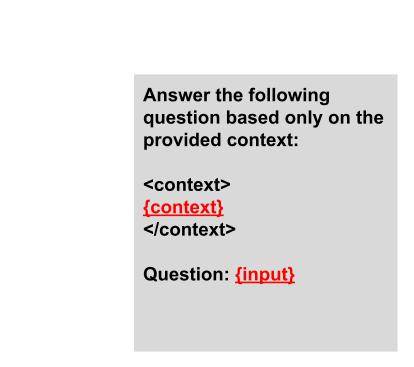

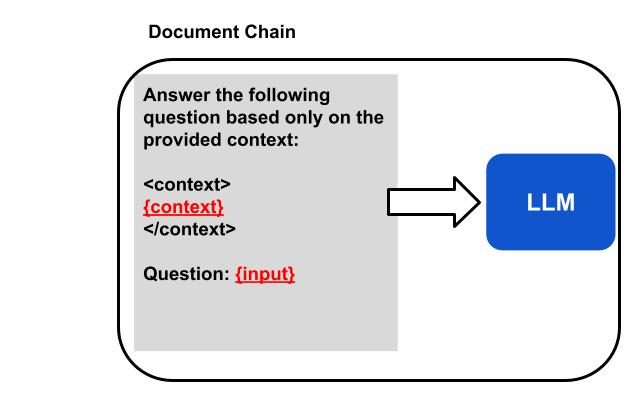

In [53]:
from langchain.chains import create_retrieval_chain

retriever = vector.as_retriever()
retrieval_chain = create_retrieval_chain(retriever, document_chain_lcel)

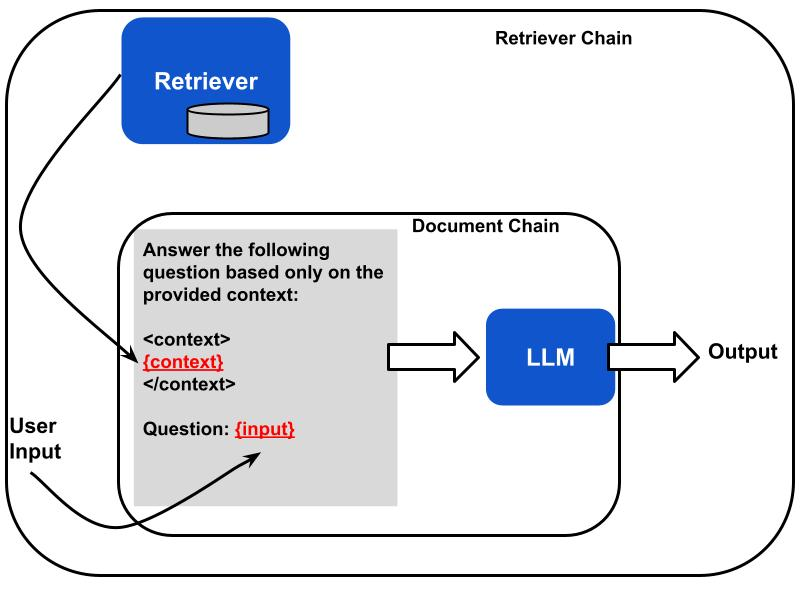

In [54]:
response = retrieval_chain.invoke({"input": "how can langsmith help with testing?"})

In [55]:
print(response["answer"])

# LangSmith offers several features that can help with testing:...

LangSmith can help with testing by providing a platform for agent engineering, managing users, organizations, workspaces, and resources within an organization. It also allows for setting up resource tags to group resources within a workspace and configuring usage limits on tracing. Additionally, LangSmith offers features such as tracing projects, datasets, annotation queues, and prompts which can aid in testing processes.


In [56]:
response = retrieval_chain.invoke({"input": "how can use it?"})
print(response["answer"])

To use the Organization User role, you need to be part of an organization that is on a plan with multiple workspaces. If your organization is limited to a single workspace, all users will automatically have the role of Organization Admin. Custom organization-scoped roles are not available at the moment. Different permissions and capabilities are associated with each role, so it is important to understand the differences between Organization User and Organization Admin roles within the organization.
